### 0. Import the packages

In [1]:
import os,sys,shutil,mmap
import pickle as pickle
import numpy as np                                       # fast vectors and matrices

import time

sys.path.insert(0,'lib/')
import config

#from resampy import resample

from intervaltree import Interval, IntervalTree

### 1. Resample the data
Resample the recording and labels of the 331 recordings from the data base from 44100 Hz to 11025 Hz.

#### 1.1 Resample the labels of the data set.
The 331 resampled labels are saved in a dictionary whose
- keys are integers (the ids of the recordings)
- values are intervaltrees (for the different intervals of the recording it gives the played notes between 1 and 128)

In [2]:
with open(config.labels_path_11, 'rb') as f:
    labels = pickle.load(f)

In [3]:
print(len(labels), 'labels')

331 labels


In [4]:
for key, value in labels.items() :
    if key == 2239:
        # id of the recording
        print (key)
        # intervaltree containing for each note intervals in which it is played
        print (type(value))

2239
<class 'intervaltree.intervaltree.IntervalTree'>


#### 1.2 Resample recordings

Create a dictionary containing the resampled data (recordings). Use Memory-mapped file objects.
For each recording data[rec_id] is a tuple:
1. data[rec_id][0] is the memory-mapped file object to the recording. It can be accesed by 
~~~~~~
np.frombuffer(data[rec_id][0], dtype=np.float32).copy()
~~~~~~
2. data[rec_id][1] is its length (float)

In [3]:
sz_float = 4

In [3]:
# downsample by integer factor
def resample_music_new(file_in, file_out, ratio=4):
    print('.. sampling with ratio {}'.format(ratio))
 
    fd = os.open(file_in, os.O_RDONLY)
    buff = mmap.mmap(fd, 0, mmap.MAP_SHARED, mmap.PROT_READ)
    data_in = np.frombuffer(buff, dtype=np.float32).copy()
    
    data_out = data_in[::4]
    import matplotlib.pyplot as plt
    # import pickle
    with open(file_out, 'wb') as f_out:
        np.save(f_out, data_out)
        # pickle.dump(data_out, f_out)
    os.close(fd)

In [4]:
# resample the data and save in config.records_path_11_new.
data = dict()
for record in os.listdir(config.records_path):
    resample_music_new(config.records_path + record, config.records_path_11_new + record, 4)
    fd = os.open(config.records_path_11_new + record, os.O_RDONLY)
    buff = mmap.mmap(fd, 0, mmap.MAP_SHARED, mmap.PROT_READ)
    data[int(record[:-4])] = (buff, len(buff)/sz_float)
    os.close(fd)

.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4


.. sampling with ratio 4
.. sampling with ratio 4
.. sampling with ratio 4


In [14]:
# import the data
data = dict()
for record in os.listdir(config.records_path):
    fd = os.open(config.records_path_11_new + record, os.O_RDONLY)
    buff = mmap.mmap(fd, 0, mmap.MAP_SHARED, mmap.PROT_READ)
    data[int(record[:-4])] = (buff, len(buff)/sz_float)
    os.close(fd)

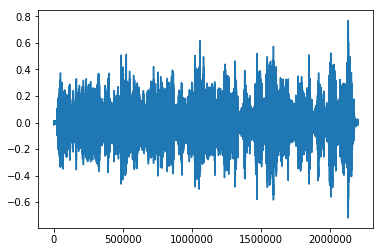

In [15]:
# In the first 20 entries one entry is explidingly high. 
# When creating the sample and the batches the beginning of the recording are cut off.
# For calculating the average and std the first 20 are cut off.
import matplotlib.pyplot as plt
%matplotlib inline
for record in os.listdir(config.records_path):
    plt.plot(np.frombuffer(data[int(record[:-4])][0], dtype=np.float32).copy()[20:])
    plt.show()
    break

In [8]:
for key, value in data.items() :
    if key == 2494:
        # id of the recording
        print ('Key:',key,', Format:',type(key))
        # its value is a tuple
        print ('Value:',value)
        # 1. value: reference to recording
        print ("1. Entry: Memory-mapped file objects ,", data[2494][0])
        # to access content use:
        x = np.frombuffer(data[2494][0], dtype=np.float32).copy()
        print('For example:')
        print(x[3005:3017])
        print ("2. Entry: length of recording",str(data[2494][1]),", Type:",type(data[2494][1]))
        #print(len(x))

Key: 2494 , Format: <class 'int'>
Value: (<mmap.mmap object at 0x7fd4360350c0>, 3275168.0)
1. Entry: Memory-mapped file objects , <mmap.mmap object at 0x7fd4360350c0>
For example:
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00 -3.0517578e-05
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
2. Entry: length of recording 3275168.0 , Type: <class 'float'>
